In [45]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
import numpy as np
import matplotlib.pyplot as plt
from pyabc.utils import plot_marginals
%matplotlib inline

In [52]:
prior_lambda = pyabc.Prior('gamma', 0.1, 1/0.1, name=r'$\lambda$') 
 
def simulator(ld): 
    return np.random.exponential(ld, 30) 

def summary_mean(X): 
    return np.mean(X) 

In [53]:
#observation 
# Set the generating parameters that we will try to infer 
ld0 = 0.1

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(ld0) 

In [54]:
rejSampler = pyabc.RejectionSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
rejSampler.sample(threshold = 0.01, nr_samples = 500)

Rejection sampler started with threshold: 0.01 and number of samples: 500
Samples:    500 - Threshold: 0.01 - Iterations:       1000 - Acceptance rate: 0.500000 - Time:     0.05 s


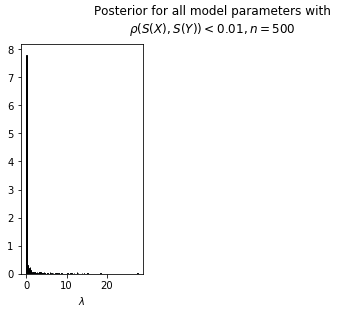

In [55]:
plot_marginals(rejSampler)